In [1]:
# Scientific libraries
import scipy
import pylab
import numpy as np

# Audio libraries
from scipy.io import wavfile
from IPython.display import display, Audio

# Operational libraries
import os
import matplotlib.pylab as plt
%matplotlib inline

## Read in the data

In [2]:
audio_dir = "/data/fs4/datasets/magnolia/sisec/dev/"
fs, snda = wavfile.read(os.path.join(audio_dir, "dev_Ca1_Ce_A_src.wav"))
fs, sndb = wavfile.read(os.path.join(audio_dir, "dev_Ca1_Ce_B_src.wav"))

sndab = snda+sndb

## Short Time Fourier Transform

In [3]:
def stft(x, fs, framesz, hop):
    '''
    Short Time Fourier Transform (STFT) - Spectral decomposition
    
    Input:
        x = signal (1-d array, which is amp/sample)
        fs = sampling frequency (in Hz)
        framesz = frame size (in seconds)
        hop = skip length (in seconds)
        
    Output:
        X = 2d array, window by number of windows
    '''
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([scipy.fft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    return X

def istft(X, fs, T, hop):
    ''' Inverse Short Time Fourier Transform (iSTFT) - Spectral reconstruction
    
    Input:
        X = set of 2D windows
        fs = sampling frequency (in Hz)
        T = total length of reconstruction willing to be performed
        hop = skip rate
    '''
    x = scipy.zeros(T*fs)
    framesamp = X.shape[1]
    hopsamp = int(hop*fs)
    for n,i in enumerate(range(0, len(x)-framesamp, hopsamp)):
        x[i:i+framesamp] += scipy.real(scipy.ifft(X[n]))
    return x


## Decomposition and Creation of Spectral Mask

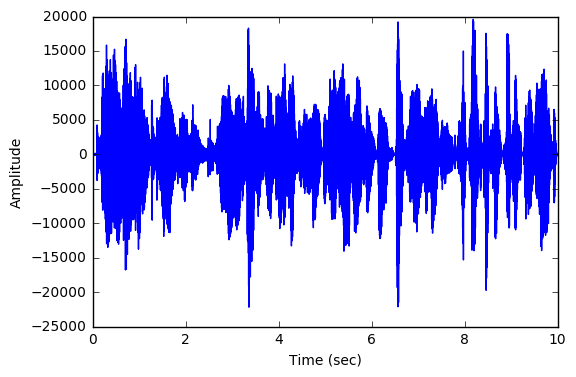

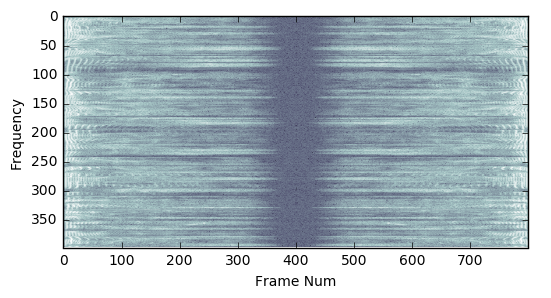

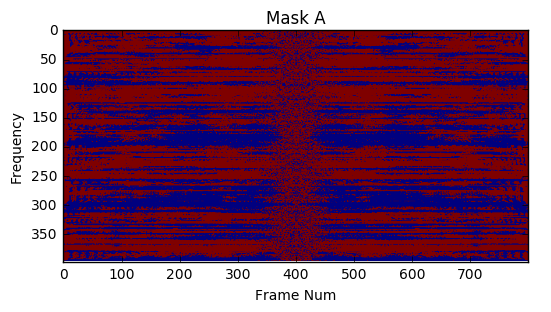

In [4]:
# Spectrograms
sndaft = stft( snda, fs, 0.05, 0.025)
sndbft = stft( sndb, fs, 0.05, 0.025)
sndabft = stft( sndab, fs, 0.05, 0.025)

# Spectral mask
snda_mask = abs(sndaft) > abs(sndbft)

# Plot time and spectrum
t = np.linspace(0, len(sndab)/fs, num=len(sndab))
plt.figure(); plt.plot(t,sndab); plt.ylabel('Amplitude'); plt.xlabel('Time (sec)')
plt.figure(); plt.imshow(np.log(abs(sndabft)), cmap='bone'); plt.ylabel('Frequency'); plt.xlabel('Frame Num')
plt.figure(); plt.imshow(snda_mask); plt.title('Mask A'); plt.ylabel('Frequency'); plt.xlabel('Frame Num')

## Reconstruction (first Fourier and time-domain)

In [5]:
sndareconft = abs(sndabft)*snda_mask*np.exp( 1j* np.angle(sndabft))  # Apply mask A
sndarecon = istft( sndareconft, fs, 5, 0.025 )

sndbreconft = abs(sndabft)*(1-snda_mask)*np.exp( 1j* np.angle(sndabft))  # Apply mask B = 1 - A
sndbrecon = istft( sndbreconft, fs, 5, 0.025 )

## Play audio

In [6]:
print('Original signal')
display(Audio(sndab, rate=fs))
print('Reconstruction of signal A')
display(Audio(sndarecon,rate=fs))
print('Reconstruction of signal B')
display(Audio(sndbrecon,rate=fs))

Original signal


Reconstruction of signal A


Reconstruction of signal B
